Based on video:

https://www.youtube.com/watch?v=9d5-Ti6onew

note: .ix is deprecated, use loc instead

In [1]:
import pandas as pd

Creating and merging series into a dataframe 
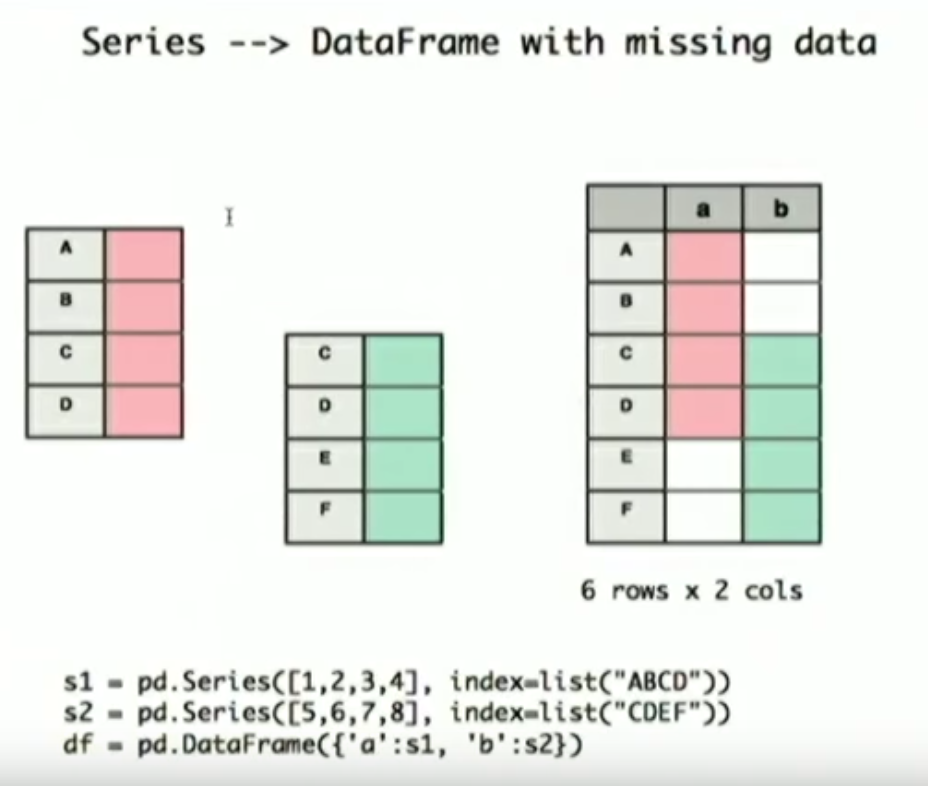

In [13]:
s1 = pd.Series([1,2,3,4], index = ['A','B','C','D'])

In [14]:
s2 = pd.Series([3,4,5,6], index = ['C','D','E','F'])

In [15]:
s2

C    3
D    4
E    5
F    6
dtype: int64

In [16]:
df = pd.DataFrame({'col a':s1, 'col b': s2})

In [17]:
df

,col a,col b
A,1.0,NaN
B,2.0,NaN
C,3.0,3.0
D,4.0,4.0
E,NaN,5.0
F,NaN,6.0


Re-indexing

In [20]:
df.reindex(index=['D','E'], columns = ['col b'])

,col b
D,4.0
E,5.0


In [19]:
df

,col a,col b
A,1.0,NaN
B,2.0,NaN
C,3.0,3.0
D,4.0,4.0
E,NaN,5.0
F,NaN,6.0


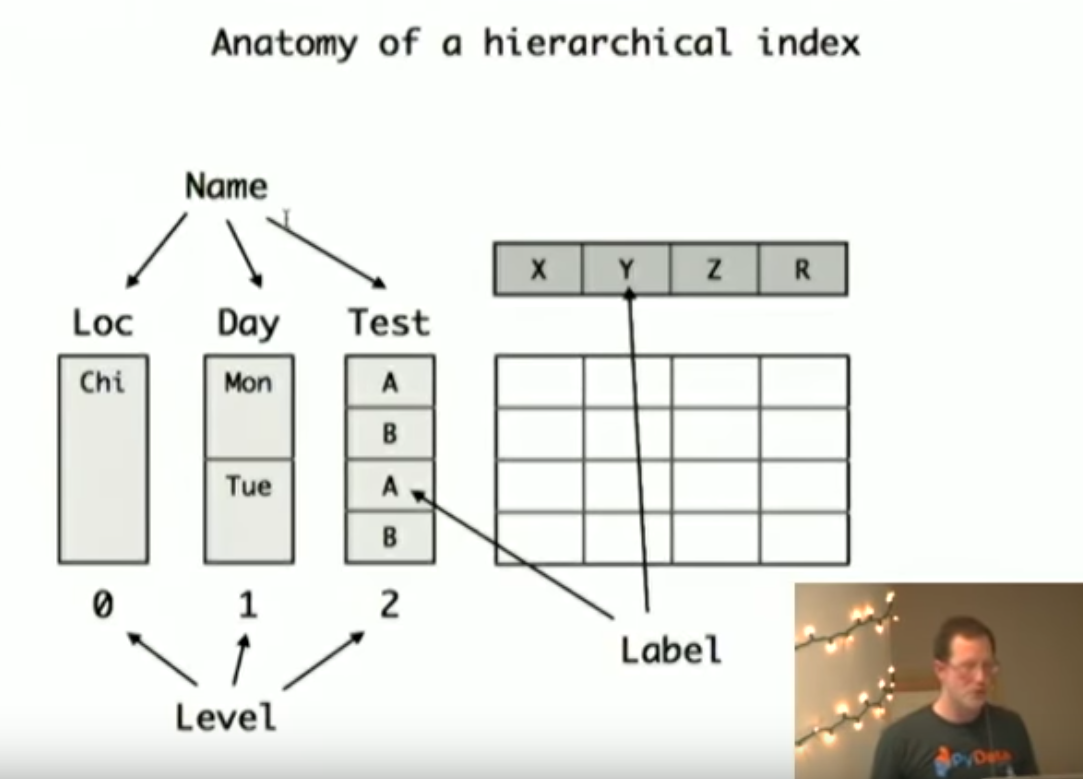

 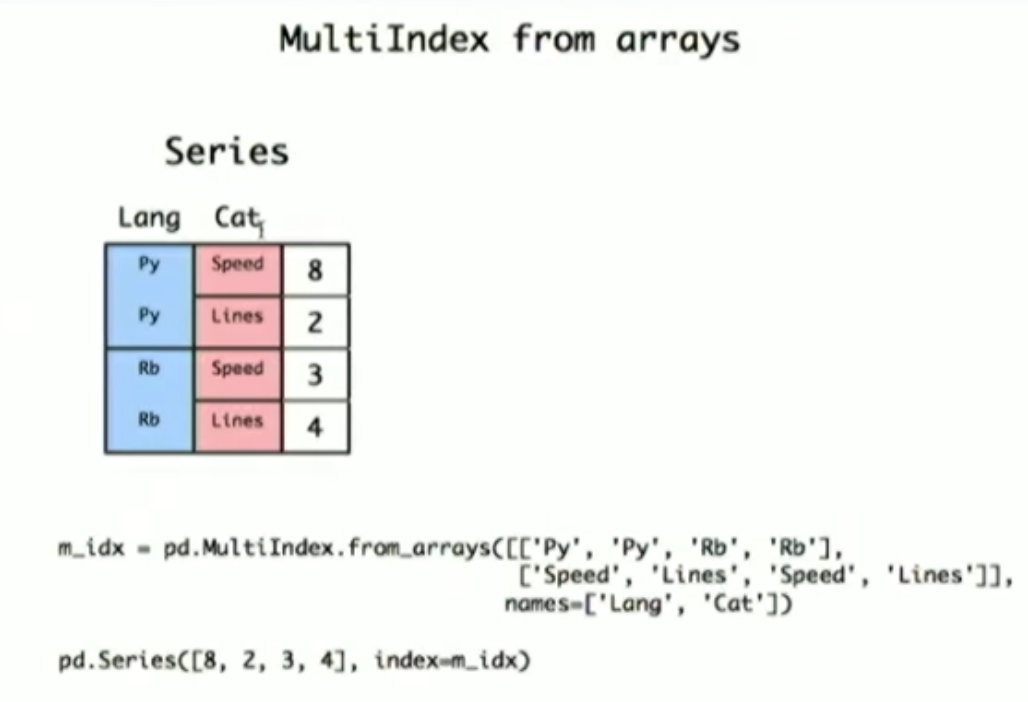

Idea: Use multi-index for
Node Name and Node property

In [26]:
tuples = [('sling1','length'),
         ('sling1','EA'),
         ('sling2','length')]
m_indx = pd.MultiIndex.from_tuples(tuples, names = ['node','property'])
values = ([1,2,3])
loadcase1 = pd.Series(values, index=m_indx)

In [27]:
loadcase1

node    property
sling1  length      1
        EA          2
sling2  length      3
dtype: int64

In [28]:
tuples = [('sling1','length'),       
         ('sling2','length')]
m_indx = pd.MultiIndex.from_tuples(tuples, names = ['node','property'])
values = ([1,-0.7])
loadcase2 = pd.Series(values, index=m_indx)

In [29]:
loadcase2

node    property
sling1  length      1.0
sling2  length     -0.7
dtype: float64

In [30]:
loadmatrix = pd.DataFrame({'loadcase 1':loadcase1, 'loadcase 2': loadcase2})

In [31]:
loadmatrix

loadcase 1  loadcase 2
node   property                        
sling1 EA                 2         NaN
       length             1         1.0
sling2 length             3        -0.7

In [42]:
tuples = [('sling1','length')]
m_indx = pd.MultiIndex.from_tuples(tuples, names = ['node','property'])
values = ([-1.3])
loadcase3 = pd.Series(values, index=m_indx)

to_be_added = pd.DataFrame({'loadcase 3': loadcase3})

In [44]:
to_be_added

,,loadcase 3
node,property,
sling1,length,-1.3


In [45]:
pd.concat([loadmatrix, to_be_added], axis=1)

loadcase 1  loadcase 2  loadcase 3
node   property                                    
sling1 EA                 2         NaN         NaN
       length             1         1.0        -1.3
sling2 length             3        -0.7         NaN

In [46]:
pd.concat([loadmatrix, loadcase3], axis=1)

loadcase 1  loadcase 2    0
node   property                             
sling1 EA                 2         NaN  NaN
       length             1         1.0 -1.3
sling2 length             3        -0.7  NaN

In [47]:
loadcase3.name = 'lc3'
pd.concat([loadmatrix, loadcase3], axis=1)

loadcase 1  loadcase 2  lc3
node   property                             
sling1 EA                 2         NaN  NaN
       length             1         1.0 -1.3
sling2 length             3        -0.7  NaN

In [53]:
for loadcase in loadmatrix.columns:
    print('----------------------')
    print(loadcase)
    contents = loadmatrix[loadcase]
    
    # loop over the index
    for index, value in contents.items():
        print(index)
        print(value)
    
    
    

----------------------
loadcase 1
('sling1', 'EA')
2
('sling1', 'length')
1
('sling2', 'length')
3
----------------------
loadcase 2
('sling1', 'EA')
nan
('sling1', 'length')
1.0
('sling2', 'length')
-0.7
